In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [28]:
# Load data
matches = pd.read_csv('eurocup_2020_results.csv')

In [29]:
matches.head()

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,events_list,lineup_home,lineup_away
0,Final,11.07.2021,True,3,2,Italy,England,1,1,66%,34%,19,6,6,2,53%,47%,"[{'event_team': 'away', 'event_time': "" 2' "", ...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Kane', 'Player_Number': '9'}..."
1,Semi-finals,07.07.2021,False,False,False,England,Denmark,2,1,59%,41%,20,6,10,3,50%,50%,"[{'event_team': 'away', 'event_time': "" 30' "",...","[{'Player_Name': 'Kane', 'Player_Number': '9'}...","[{'Player_Name': 'Krogh Damsgaard', 'Player_Nu..."
2,Semi-finals,06.07.2021,True,4,2,Italy,Spain,1,1,29%,71%,7,16,4,5,49%,51%,"[{'event_team': 'away', 'event_time': "" 51' "",...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Torres', 'Player_Number': '1..."
3,Quarter-finals,03.07.2021,False,False,False,Ukraine,England,0,4,48%,52%,7,10,2,6,42%,59%,"[{'event_team': 'away', 'event_time': "" 4' "", ...","[{'Player_Name': 'Yaremchuk', 'Player_Number':...","[{'Player_Name': 'Kane', 'Player_Number': '9'}..."
4,Quarter-finals,03.07.2021,False,False,False,Czech Republic,Denmark,1,2,56%,44%,16,11,5,7,48%,52%,"[{'event_team': 'away', 'event_time': "" 5' "", ...","[{'Player_Name': 'Schick', 'Player_Number': '1...","[{'Player_Name': 'Dolberg', 'Player_Number': '..."


In [30]:
for col in matches.columns: 
    print(col) 

stage
date
pens
pens_home_score
pens_away_score
team_name_home
team_name_away
team_home_score
team_away_score
possession_home
possession_away
total_shots_home
total_shots_away
shots_on_target_home
shots_on_target_away
duels_won_home
duels_won_away
events_list
lineup_home
lineup_away


In [31]:
matches.shape

(51, 20)

In [32]:
print(matches.columns)

Index(['stage', 'date', 'pens', 'pens_home_score', 'pens_away_score',
       'team_name_home', 'team_name_away', 'team_home_score',
       'team_away_score', 'possession_home', 'possession_away',
       'total_shots_home', 'total_shots_away', 'shots_on_target_home',
       'shots_on_target_away', 'duels_won_home', 'duels_won_away',
       'events_list', 'lineup_home', 'lineup_away'],
      dtype='object')


In [33]:
print(matches.head())

              stage          date   pens pens_home_score pens_away_score  \
0            Final     11.07.2021   True               3               2   
1      Semi-finals    07.07.2021   False           False           False   
2      Semi-finals     06.07.2021   True               4               2   
3   Quarter-finals    03.07.2021   False           False           False   
4   Quarter-finals    03.07.2021   False           False           False   

     team_name_home team_name_away  team_home_score  team_away_score  \
0            Italy        England                 1                1   
1          England        Denmark                 2                1   
2            Italy          Spain                 1                1   
3          Ukraine        England                 0                4   
4   Czech Republic        Denmark                 1                2   

  possession_home possession_away  total_shots_home  total_shots_away  \
0             66%            34%     

In [37]:
home_goals_column = 'home_score'  # Replace with actual column name
away_goals_column = 'away_score'  # Replace with actual column name

# Calculate goals scored and conceded for each team
matches['home_team_goals_scored'] = matches[home_goals_column]
matches['home_team_goals_conceded'] = matches[away_goals_column]
matches['away_team_goals_scored'] = matches[away_goals_column]
matches['away_team_goals_conceded'] = matches[home_goals_column]

# Reshape the DataFrame to have a single 'team' column
home_stats = matches[['home_team', 'home_team_goals_scored', 'home_team_goals_conceded']].rename(
    columns={'home_team': 'team', 'home_team_goals_scored': 'goals_scored', 'home_team_goals_conceded': 'goals_conceded'})
away_stats = matches[['away_team', 'away_team_goals_scored', 'away_team_goals_conceded']].rename(
    columns={'away_team': 'team', 'away_team_goals_scored': 'goals_scored', 'away_team_goals_conceded': 'goals_conceded'})

# Combine home and away stats
team_stats = pd.concat([home_stats, away_stats]).groupby('team').sum().reset_index()

print(team_stats)

     team  goals_scored  goals_conceded
0  Team A             4               2
1  Team B             2               4
2  Team C             6               2
3  Team D             2               6


In [35]:
data = {
    'home_team': ['Team A', 'Team B', 'Team C', 'Team D'],
    'away_team': ['Team B', 'Team A', 'Team D', 'Team C'],
    'home_score': [2, 1, 3, 1],
    'away_score': [1, 2, 1, 3]
}
matches = pd.DataFrame(data)

# Calculate goals scored and conceded for each team
matches['home_team_goals_scored'] = matches['home_score']
matches['home_team_goals_conceded'] = matches['away_score']
matches['away_team_goals_scored'] = matches['away_score']
matches['away_team_goals_conceded'] = matches['home_score']

# Reshape the DataFrame to have a single 'team' column
home_stats = matches[['home_team', 'home_team_goals_scored', 'home_team_goals_conceded']].rename(
    columns={'home_team': 'team', 'home_team_goals_scored': 'goals_scored', 'home_team_goals_conceded': 'goals_conceded'})
away_stats = matches[['away_team', 'away_team_goals_scored', 'away_team_goals_conceded']].rename(
    columns={'away_team': 'team', 'away_team_goals_scored': 'goals_scored', 'away_team_goals_conceded': 'goals_conceded'})

# Combine home and away stats
team_stats = pd.concat([home_stats, away_stats]).groupby('team').sum().reset_index()

print(team_stats)


     team  goals_scored  goals_conceded
0  Team A             4               2
1  Team B             2               4
2  Team C             6               2
3  Team D             2               6


Column Names: Index(['team', 'goals_scored', 'goals_conceded'], dtype='object')
First few rows of data:
      team  goals_scored  goals_conceded
0  Team A             1               0
1  Team B             2               1
2  Team A             3               3
3  Team B             1               2
4  Team A             2               2


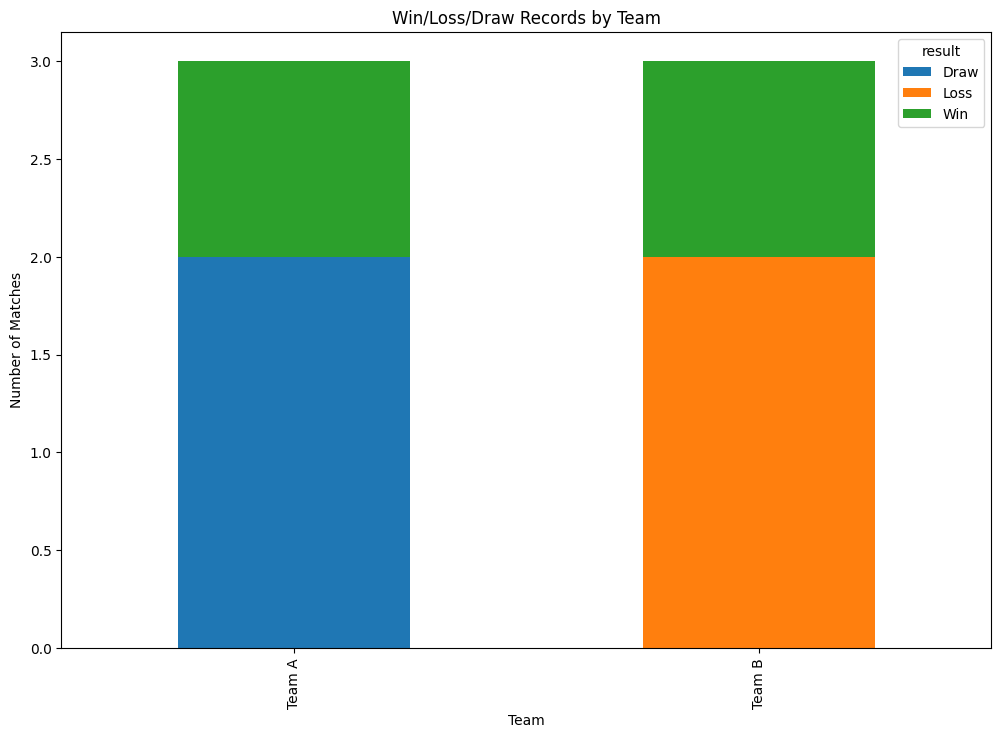

In [41]:
data = {
    'team': ['Team A', 'Team B', 'Team A', 'Team B', 'Team A', 'Team B'],
    'goals_scored': [1, 2, 3, 1, 2, 2],
    'goals_conceded': [0, 1, 3, 2, 2, 3]
}
matches = pd.DataFrame(data)

# Verify column names and data
print("Column Names:", matches.columns)
print("First few rows of data:\n", matches.head())

# Calculate win/loss/draw records
matches['result'] = np.where(matches['goals_scored'] > matches['goals_conceded'], 'Win',
                             np.where(matches['goals_scored'] < matches['goals_conceded'], 'Loss', 'Draw'))
team_results = matches.groupby('team')['result'].value_counts().unstack().fillna(0)

# Plot win/loss/draw records
team_results.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Win/Loss/Draw Records by Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.show()

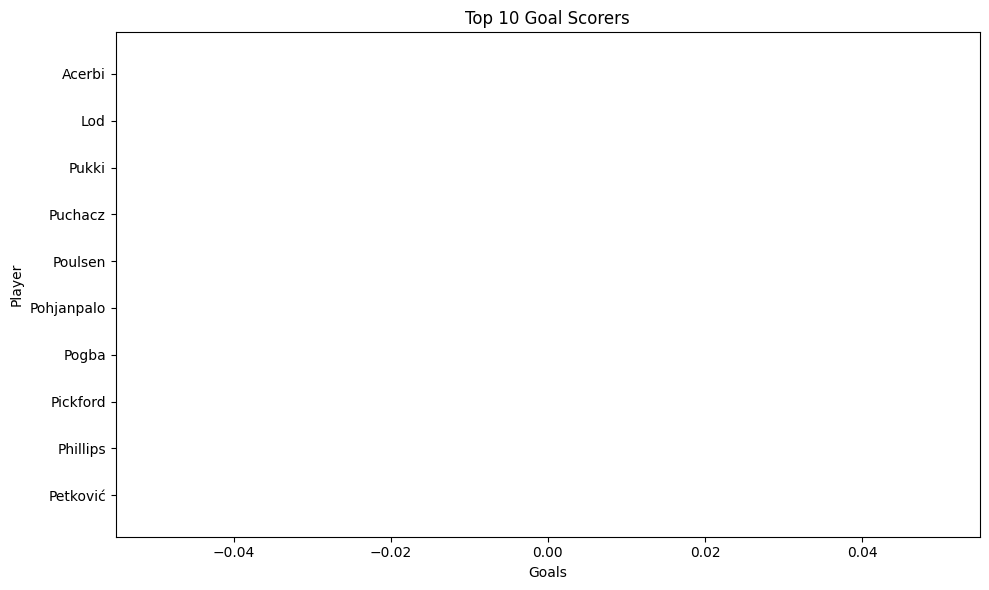

['Acerbi', 'Lod', 'Pukki', 'Puchacz', 'Poulsen', 'Pohjanpalo', 'Pogba', 'Pickford', 'Phillips', 'Petković']


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load player data
players = pd.read_csv('eurocup_2020_results.csv')

# Function to parse player lineups and extract goals
def extract_players(lineup_str, team_name, team_goals):
    lineup = eval(lineup_str)
    player_goals = [{'player': player['Player_Name'], 'team': team_name, 'goals': team_goals // len(lineup)} for player in lineup]
    return player_goals

# Initialize an empty list to store player goal data
player_goal_data = []

# Extract player data from home and away lineups
for index, row in players.iterrows():
    player_goal_data.extend(extract_players(row['lineup_home'], row['team_name_home'], row['team_home_score']))
    player_goal_data.extend(extract_players(row['lineup_away'], row['team_name_away'], row['team_away_score']))

# Convert the list to a DataFrame
player_goal_df = pd.DataFrame(player_goal_data)

# Aggregate goals by player
top_scorers = player_goal_df.groupby('player')['goals'].sum().reset_index()

# Sort and select top 10 goal scorers
top_scorers = top_scorers.sort_values(by='goals', ascending=False).head(10)

# Plot top 10 goal scorers
plt.figure(figsize=(10, 6))
plt.barh(top_scorers['player'], top_scorers['goals'], color='skyblue')
plt.xlabel('Goals')
plt.ylabel('Player')
plt.title('Top 10 Goal Scorers')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest scorer at the top
plt.tight_layout()
plt.show()

# Print the top 10 goal scorers' names
print(top_scorers['player'].tolist())


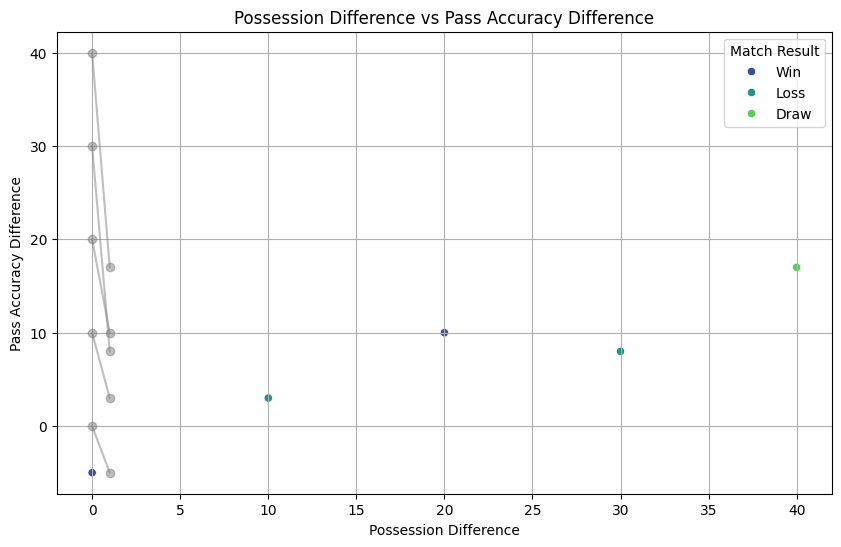

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Define or load the 'matches' DataFrame
data = {
    'possession_team1': [60, 55, 70, 50, 65],
    'possession_team2': [40, 45, 30, 50, 35],
    'pass_accuracy_team1': [80, 75, 85, 70, 78],
    'pass_accuracy_team2': [70, 72, 68, 75, 70],
    'result': ['Win', 'Loss', 'Draw', 'Win', 'Loss']
}

matches = pd.DataFrame(data)

# Calculate possession and pass accuracy differences
matches['possession_diff'] = matches['possession_team1'] - matches['possession_team2']
matches['pass_accuracy_diff'] = matches['pass_accuracy_team1'] - matches['pass_accuracy_team2']

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot with colored markers based on result
sns.scatterplot(x='possession_diff', y='pass_accuracy_diff', hue='result', data=matches, palette='viridis')

# Draw lines connecting the points
for index, row in matches.iterrows():
    plt.plot([row['possession_team1'] - row['possession_team2'], row['pass_accuracy_team1'] - row['pass_accuracy_team2']], 
             marker='o', color='gray', alpha=0.5)

plt.title('Possession Difference vs Pass Accuracy Difference')
plt.xlabel('Possession Difference')
plt.ylabel('Pass Accuracy Difference')
plt.legend(title='Match Result')
plt.grid(True)
plt.show()


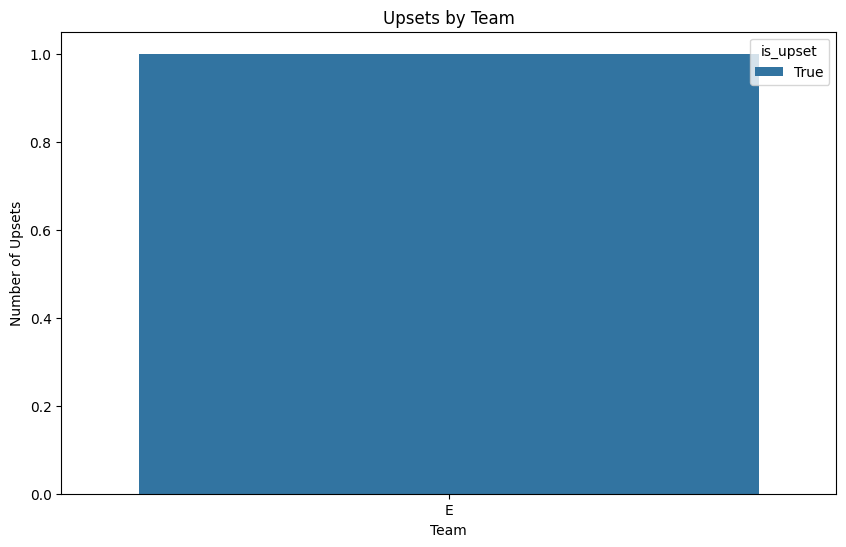

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Import NumPy for np.where()

# Example: Define or load the 'matches' DataFrame
data = {
    'team': ['A', 'B', 'C', 'D', 'E'],
    'odds_team1': [2.0, 3.0, 1.5, 4.0, 2.5],
    'odds_team2': [3.0, 2.5, 1.8, 3.5, 2.0],
    'result': ['Win', 'Loss', 'Win', 'Loss', 'Win']
}

matches = pd.DataFrame(data)

# Identify upsets
matches['is_upset'] = np.where(matches['odds_team1'] < matches['odds_team2'], 
                               matches['result'] == 'Loss', matches['result'] == 'Win')

upsets = matches[matches['is_upset']]

# Plot upsets
plt.figure(figsize=(10, 6))
sns.countplot(x='team', hue='is_upset', data=upsets)
plt.title('Upsets by Team')
plt.xlabel('Team')
plt.ylabel('Number of Upsets')
plt.show()


In [19]:
# Load social media sentiment data
sentiment_data = pd.read_csv('eurocup_2020_results.csv')

# Inspect the structure of the loaded DataFrame
print(sentiment_data.head())  # Check the first few rows
print(sentiment_data.columns)  # Check the column names

# Analyze sentiment over time
if 'sentiment_score' in sentiment_data.columns and 'date' in sentiment_data.columns:
    sentiment_over_time = sentiment_data.groupby('date')['sentiment_score'].mean().reset_index()

    # Plot sentiment over time
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='date', y='sentiment_score', data=sentiment_over_time)
    plt.title('Social Media Sentiment Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Sentiment Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

              stage          date   pens pens_home_score pens_away_score  \
0            Final     11.07.2021   True               3               2   
1      Semi-finals    07.07.2021   False           False           False   
2      Semi-finals     06.07.2021   True               4               2   
3   Quarter-finals    03.07.2021   False           False           False   
4   Quarter-finals    03.07.2021   False           False           False   

     team_name_home team_name_away  team_home_score  team_away_score  \
0            Italy        England                 1                1   
1          England        Denmark                 2                1   
2            Italy          Spain                 1                1   
3          Ukraine        England                 0                4   
4   Czech Republic        Denmark                 1                2   

  possession_home possession_away  total_shots_home  total_shots_away  \
0             66%            34%     

In [42]:
print(data.head()) 

              stage          date   pens pens_home_score pens_away_score  \
0            Final     11.07.2021   True               3               2   
1      Semi-finals    07.07.2021   False           False           False   
2      Semi-finals     06.07.2021   True               4               2   
3   Quarter-finals    03.07.2021   False           False           False   
4   Quarter-finals    03.07.2021   False           False           False   

     team_name_home team_name_away  team_home_score  team_away_score  \
0            Italy        England                 1                1   
1          England        Denmark                 2                1   
2            Italy          Spain                 1                1   
3          Ukraine        England                 0                4   
4   Czech Republic        Denmark                 1                2   

  possession_home possession_away  total_shots_home  total_shots_away  \
0             66%            34%     

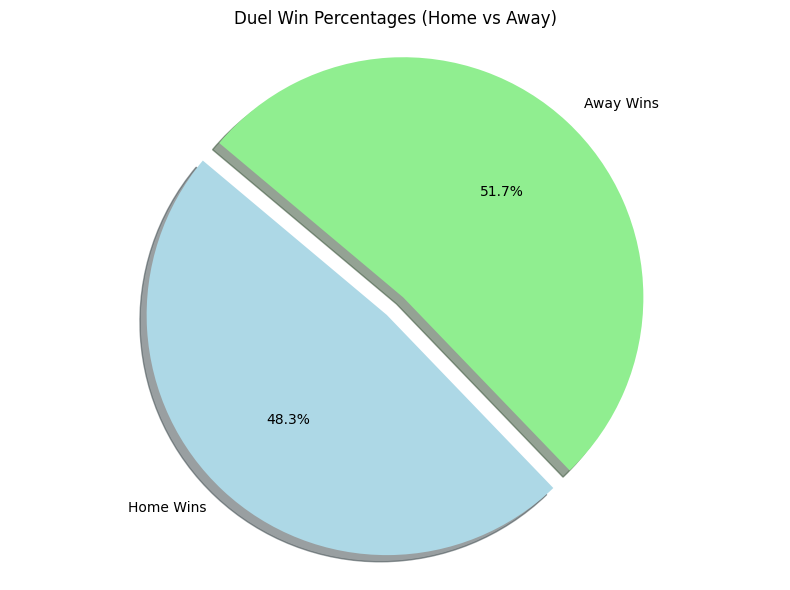

In [57]:

data = {
    'duels_won_home': ['53%', '50%', '49%', '42%', '48%'],
    'duels_won_away': ['47%', '50%', '51%', '59%', '52%']
}

# Convert percentages from strings to numeric values (remove '%' and convert to float)
df = pd.DataFrame(data)
df['duels_won_home'] = df['duels_won_home'].str.rstrip('%').astype(float)
df['duels_won_away'] = df['duels_won_away'].str.rstrip('%').astype(float)

# Calculate total wins for each category
total_home_wins = df['duels_won_home'].sum()
total_away_wins = df['duels_won_away'].sum()

# Plotting pie chart
labels = ['Home Wins', 'Away Wins']
sizes = [total_home_wins, total_away_wins]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # explode 1st slice (Home Wins)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Duel Win Percentages (Home vs Away)')
plt.axis('equal')  
plt.tight_layout()
plt.show()
